In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/2)%20Classification%20Models/Naive%20Bayes%20Classifier/train.csv"

--2024-12-11 16:00:31--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/2)%20Classification%20Models/Naive%20Bayes%20Classifier/train.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31136044 (30M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  29.69M  81.6MB/s    in 0.4s    

2024-12-11 16:00:33 (81.6 MB/s) - ‘train.csv’ saved [31136044/31136044]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('train.csv')

<ipython-input-3-c2b855ec3be6>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


In [4]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age', 'Month']

In [6]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Annual_Income'] = pd.to_numeric(data['Annual_Income'].str.replace(',', ''), errors='coerce')
data['Num_of_Loan'] = pd.to_numeric(data['Num_of_Loan'], errors='coerce')
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'], errors='coerce')
data['Changed_Credit_Limit'] = pd.to_numeric(data['Changed_Credit_Limit'], errors='coerce')
data['Outstanding_Debt'] = pd.to_numeric(data['Outstanding_Debt'].str.replace(',', ''), errors='coerce')
data['Amount_invested_monthly'] = pd.to_numeric(data['Amount_invested_monthly'].str.replace(',', ''), errors='coerce')
data['Monthly_Balance'] = pd.to_numeric(data['Monthly_Balance'].str.replace(',', ''), errors='coerce')

In [7]:
data = data.drop(columns=columns_to_drop)

In [8]:
data['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [9]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

<Figure size 1200x800 with 0 Axes>

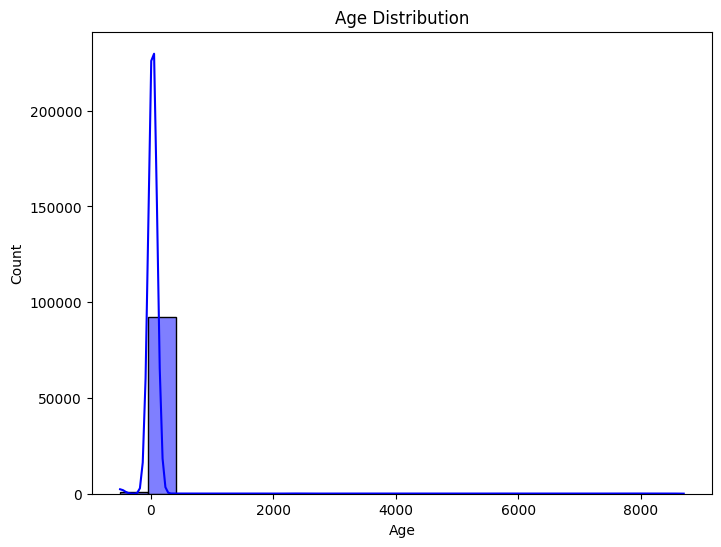

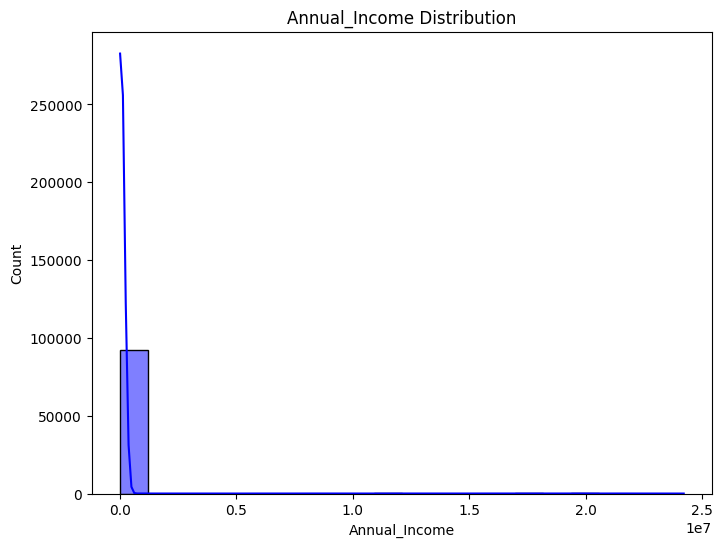

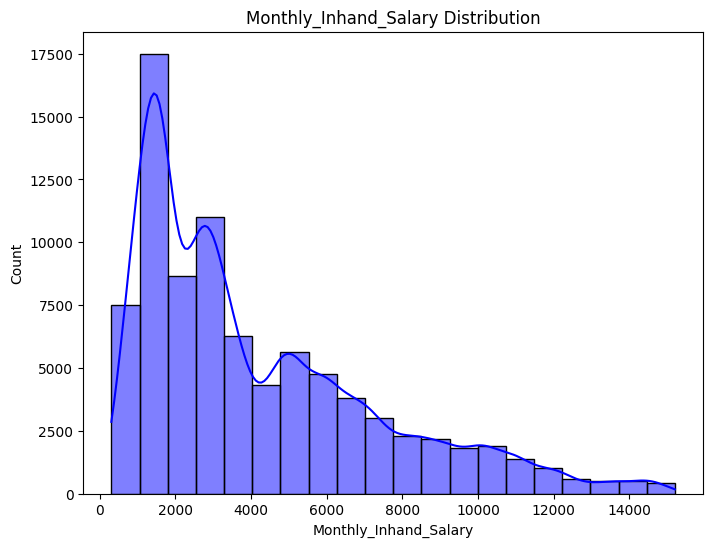

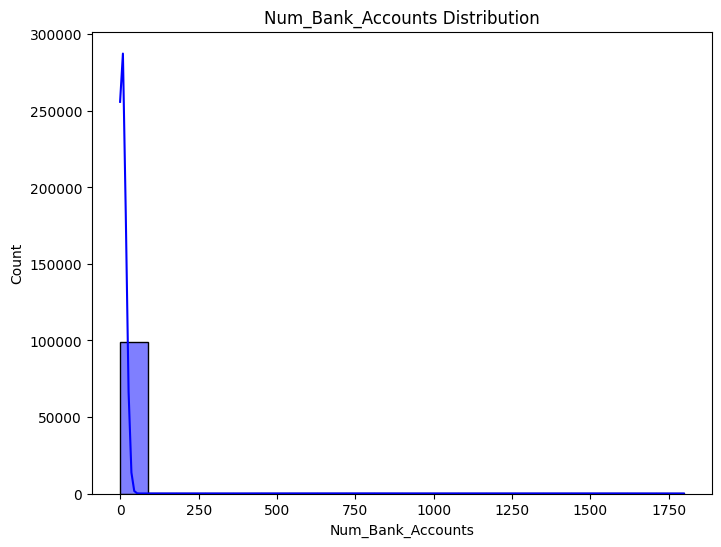

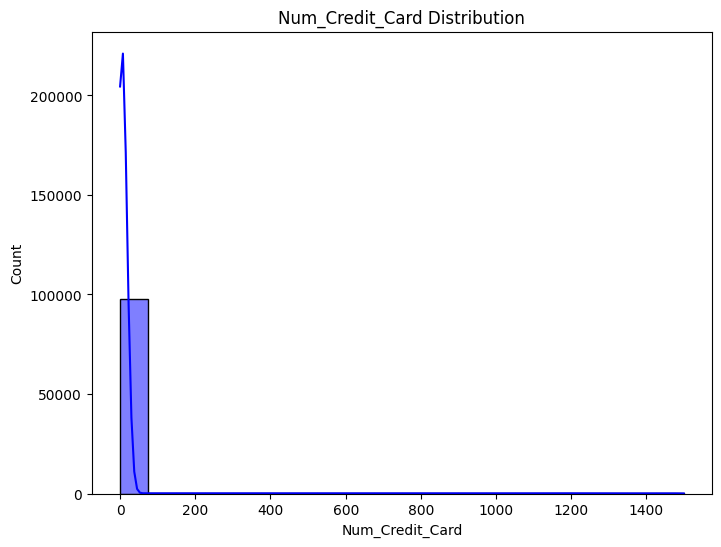

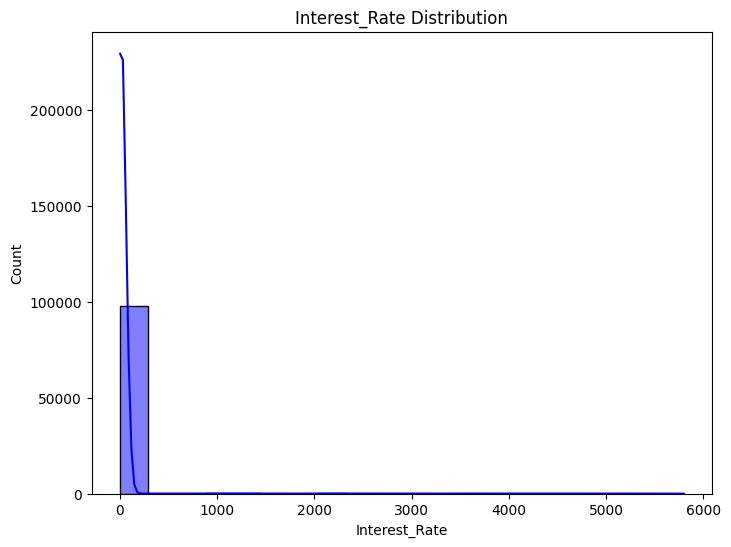

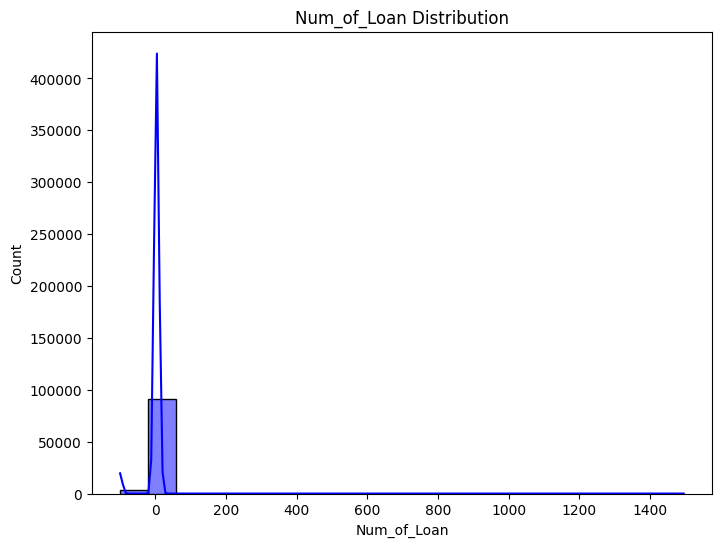

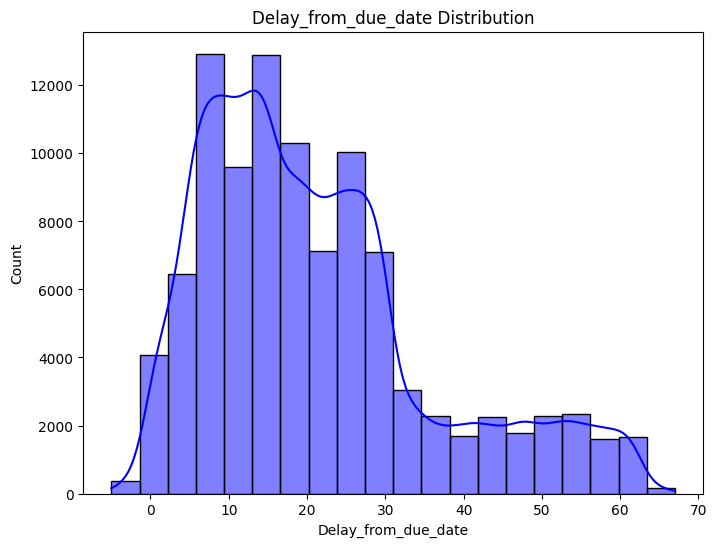

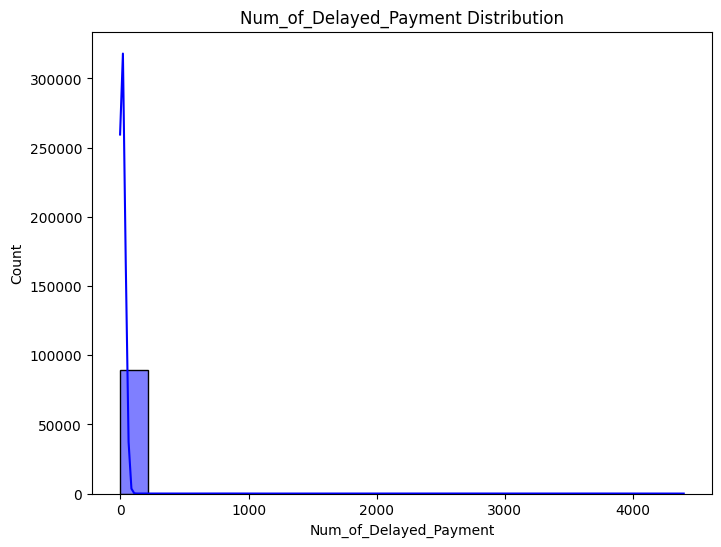

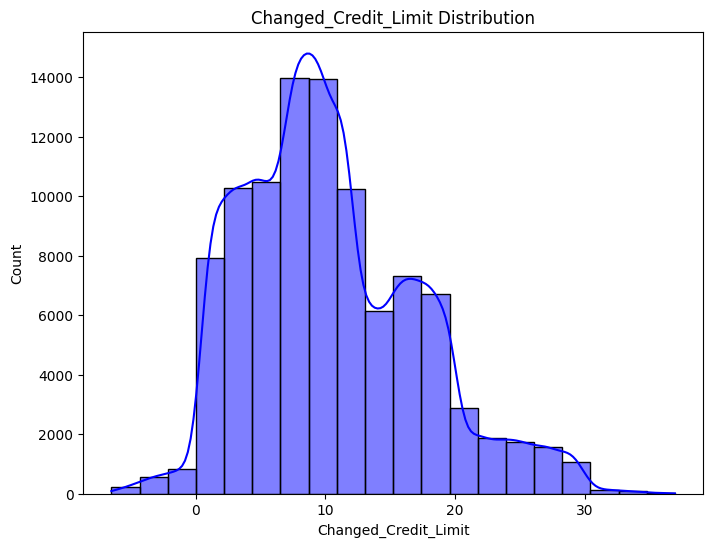

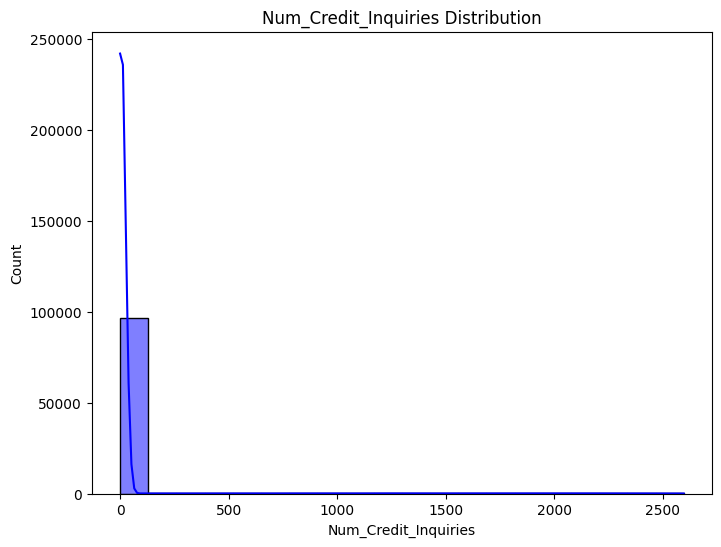

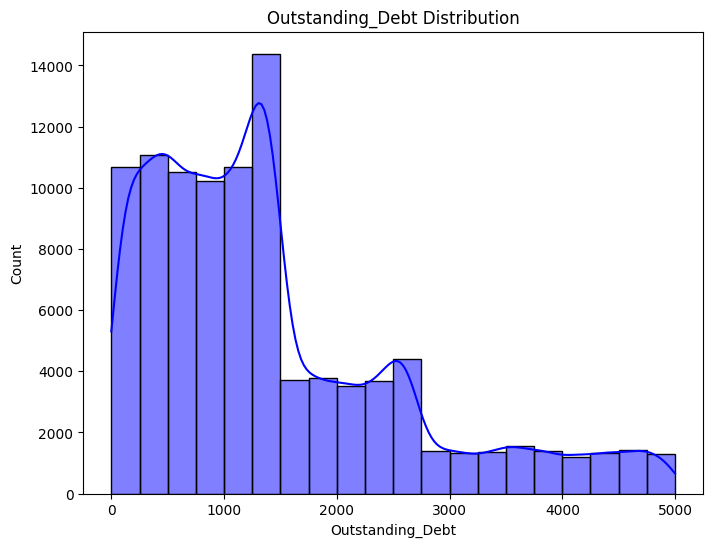

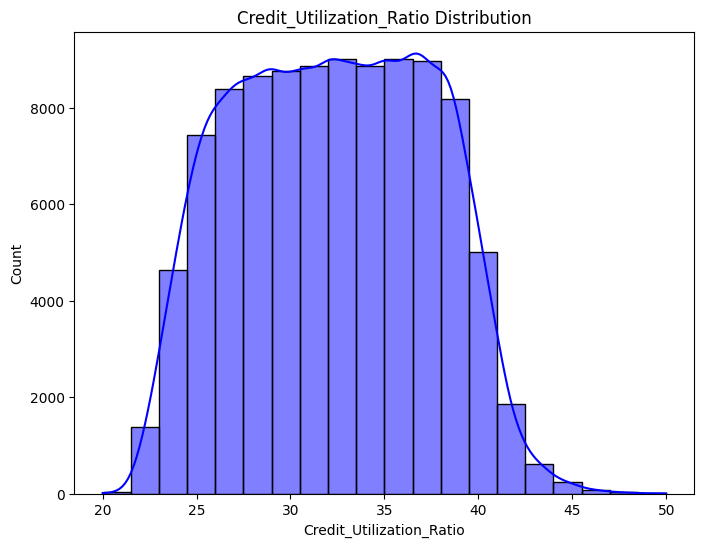

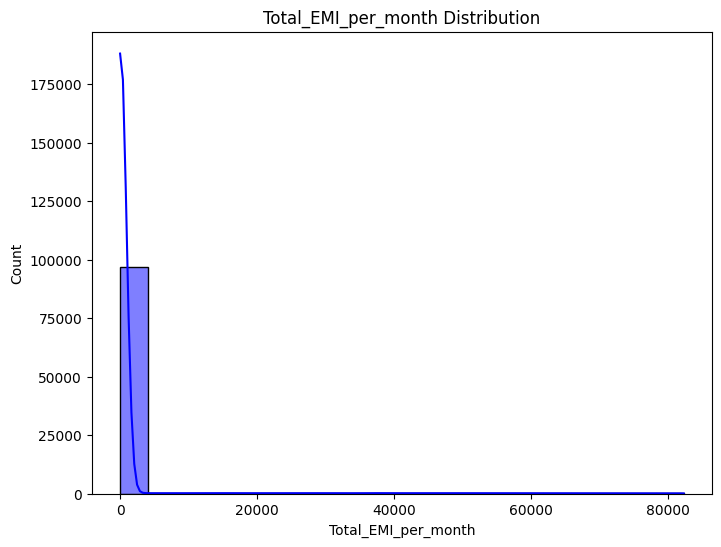

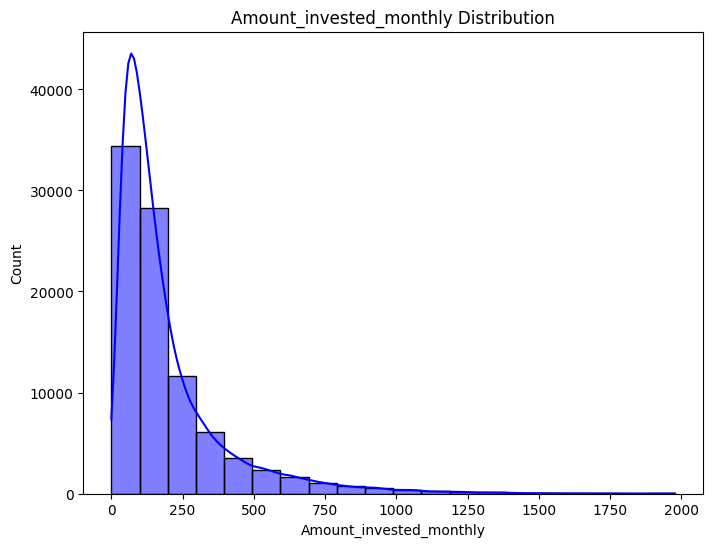

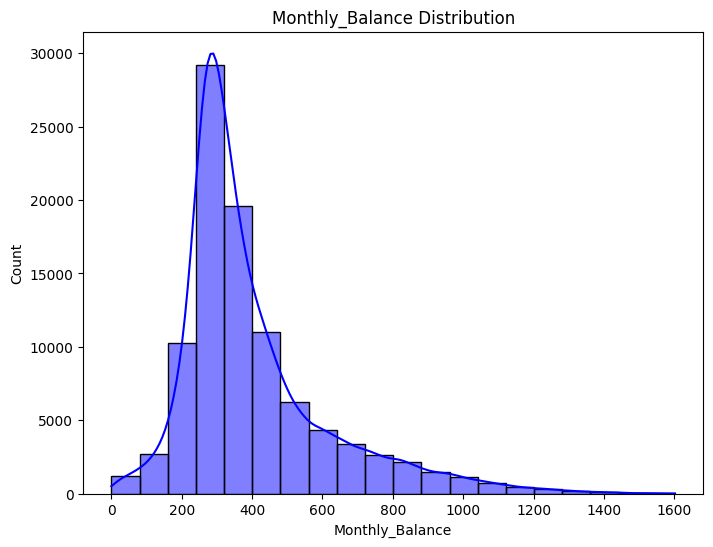

In [10]:
plt.figure(figsize=(12, 8))
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, color='blue', bins=20)
    plt.title(f'{col} Distribution')
    plt.show()

<ipython-input-11-c93ca32fb37f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='Set2')
<ipython-input-11-c93ca32fb37f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='Set2')
<ipython-input-11-c93ca32fb37f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='Set2')
<ipython-input-11-c93ca32fb37f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


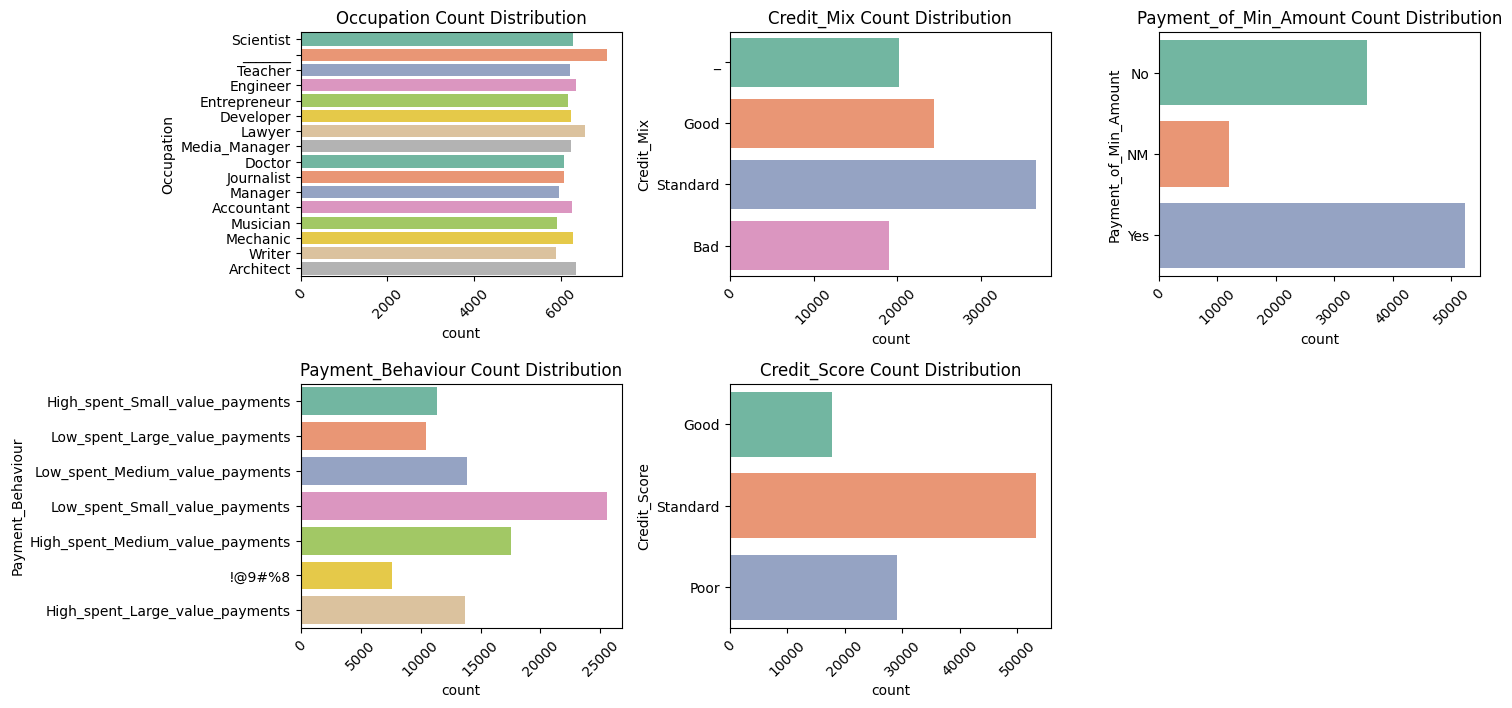

In [11]:
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid
    sns.countplot(data[col], palette='Set2')
    plt.title(f'{col} Count Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


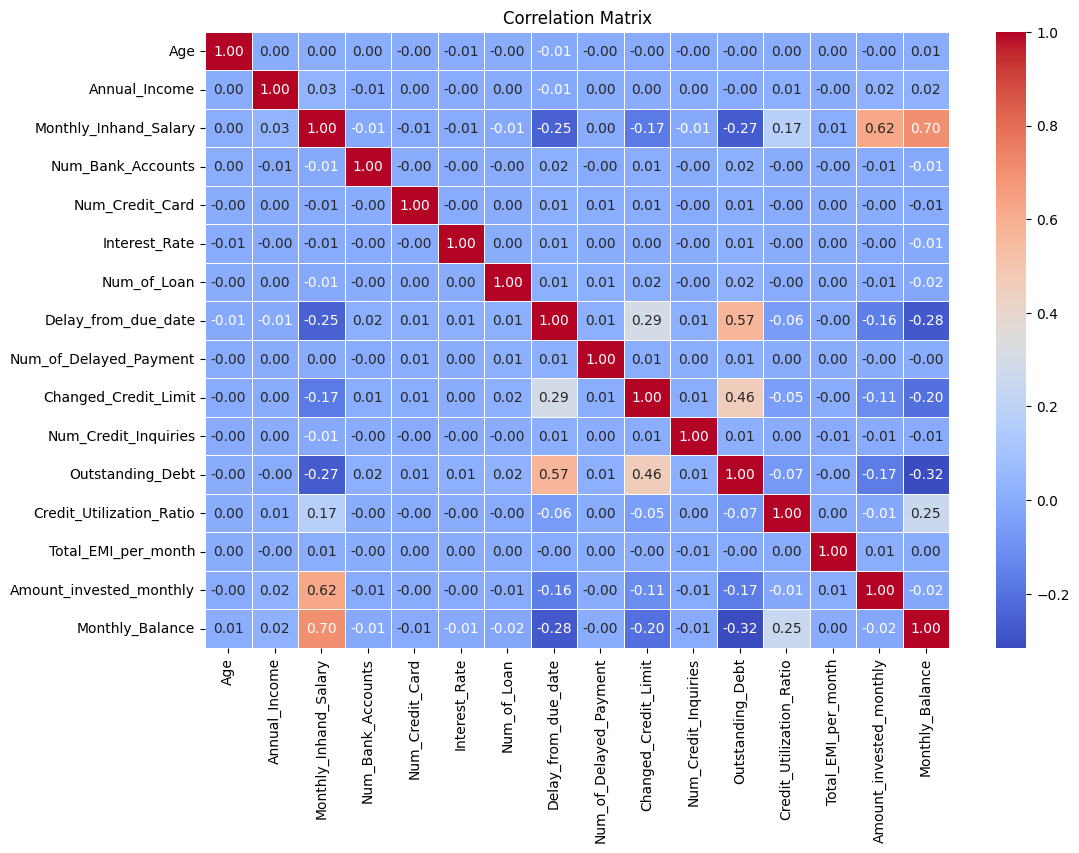

In [12]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

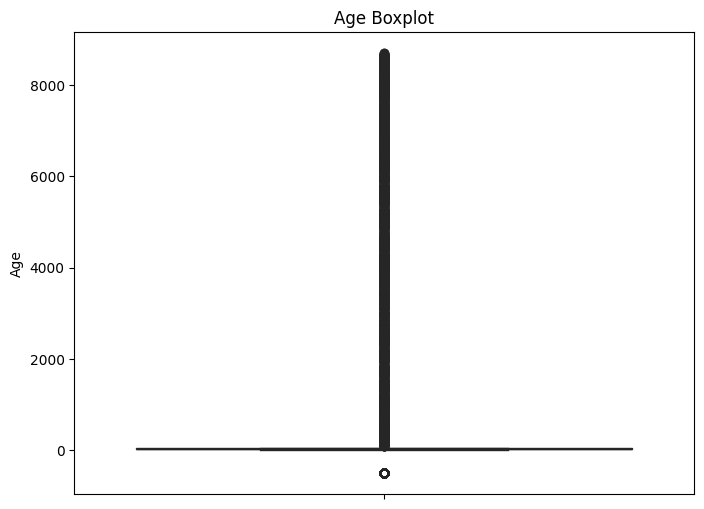

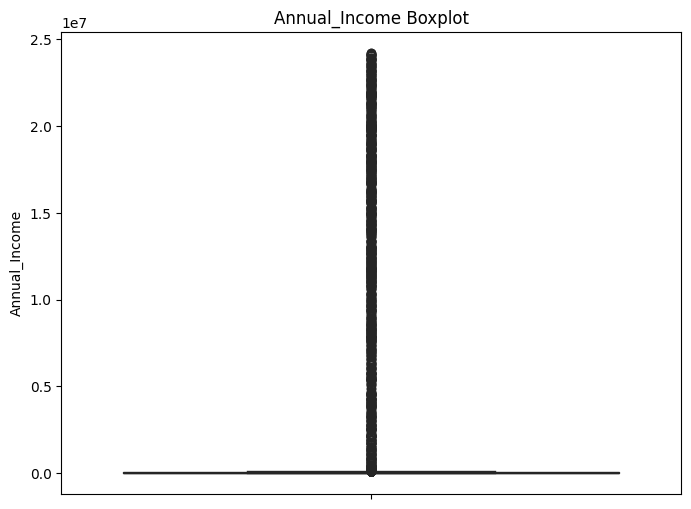

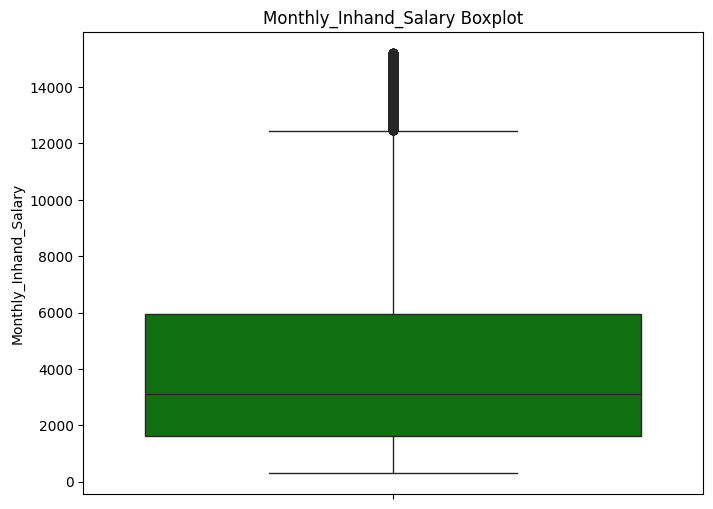

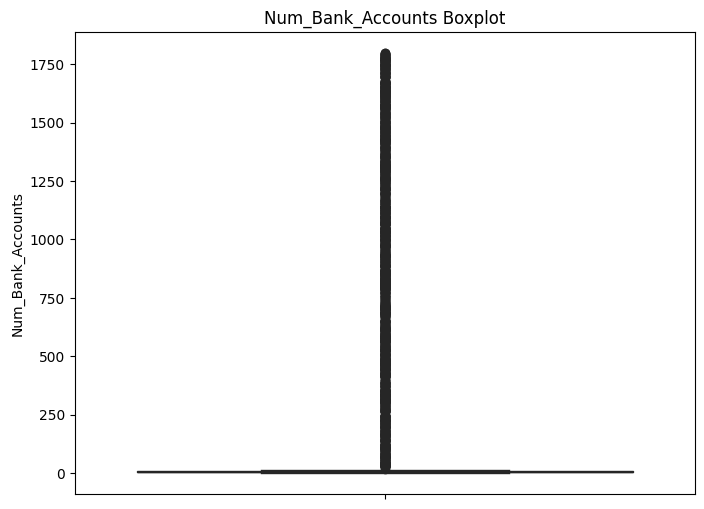

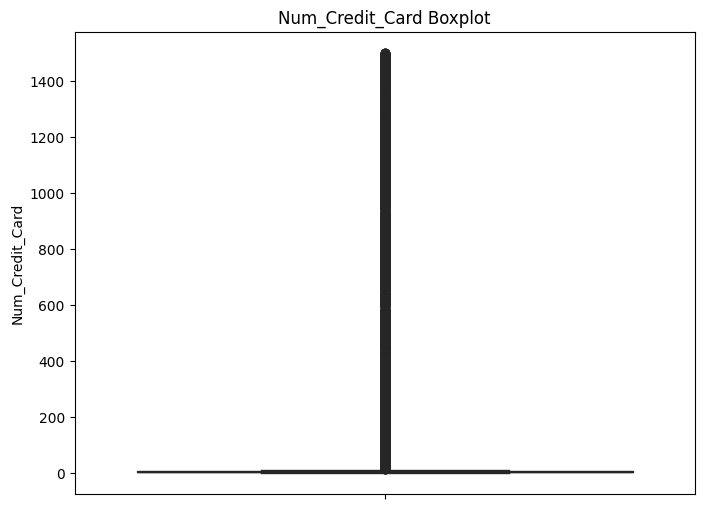

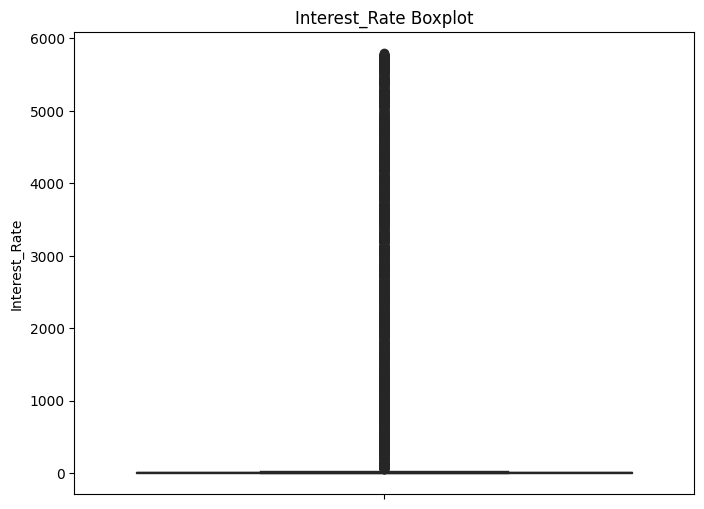

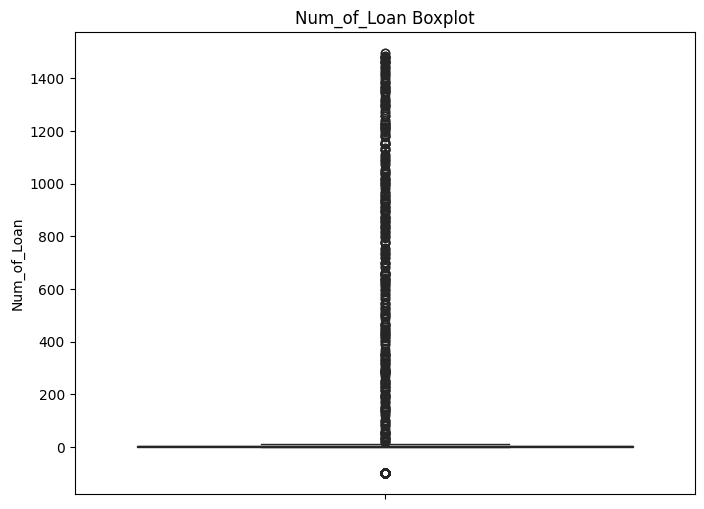

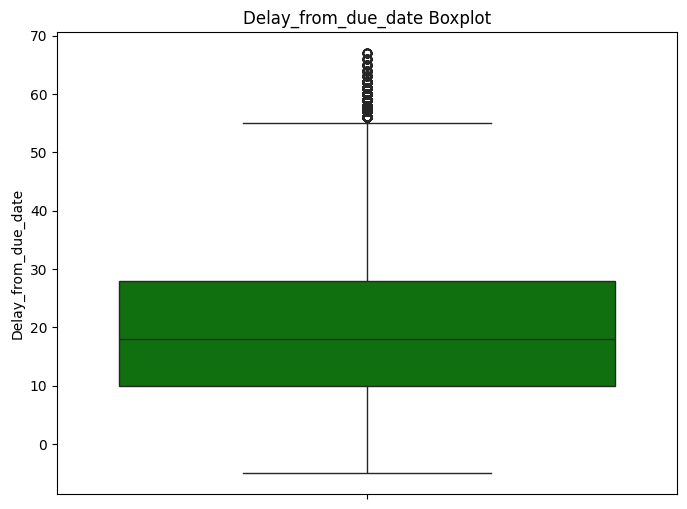

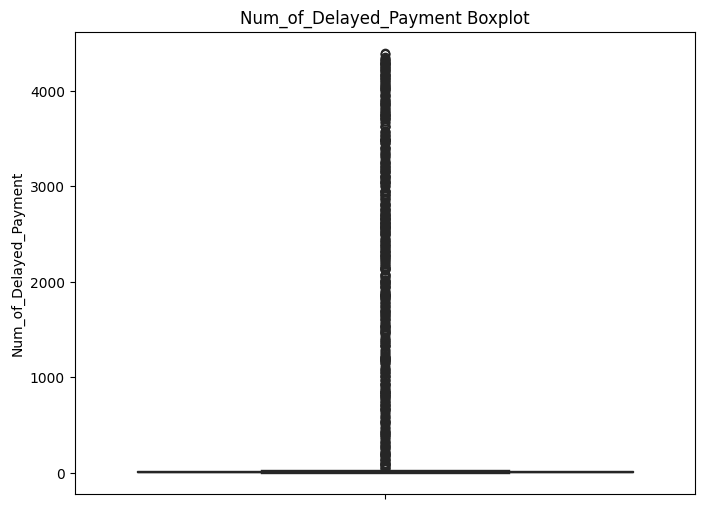

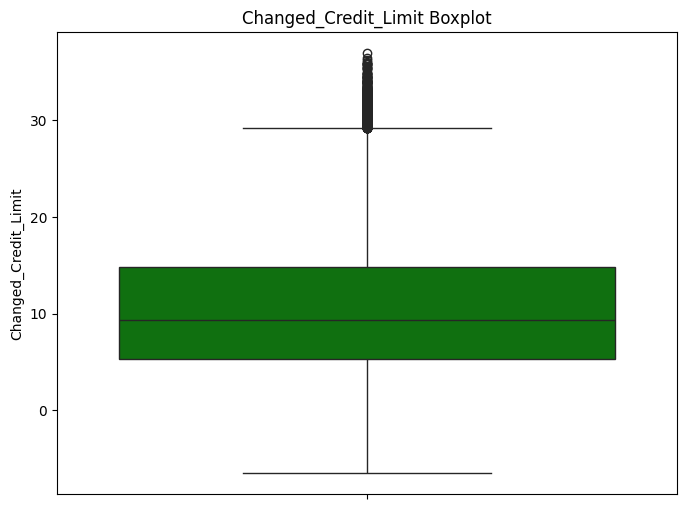

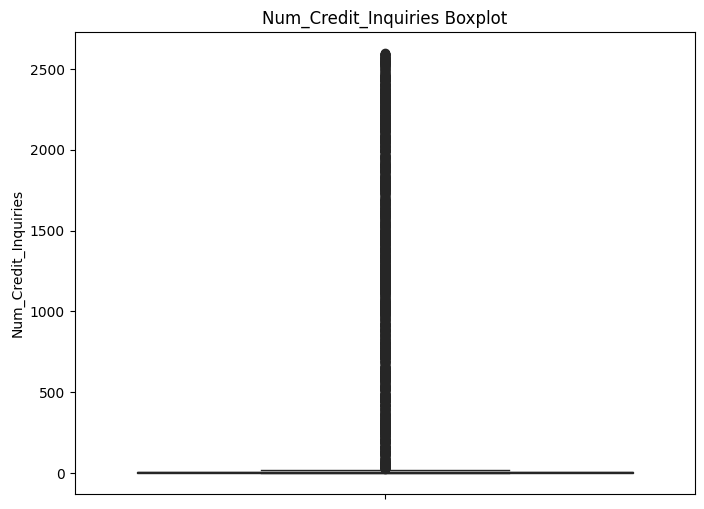

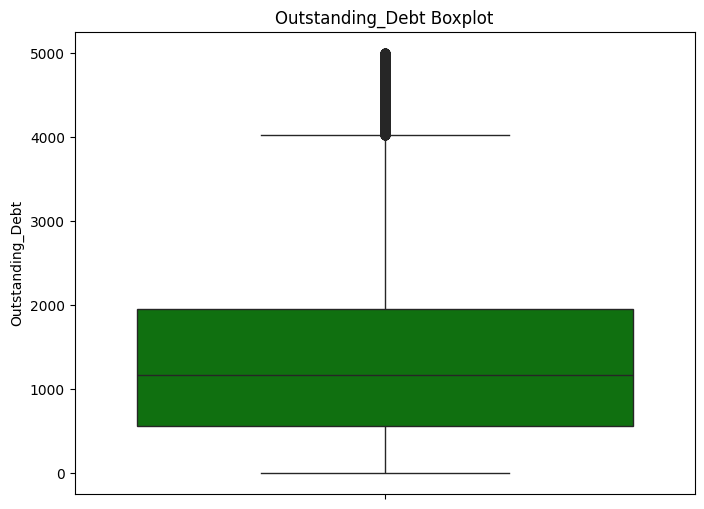

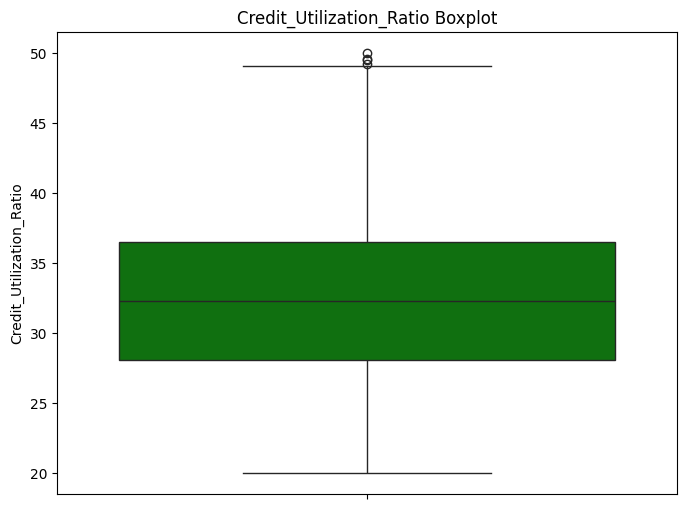

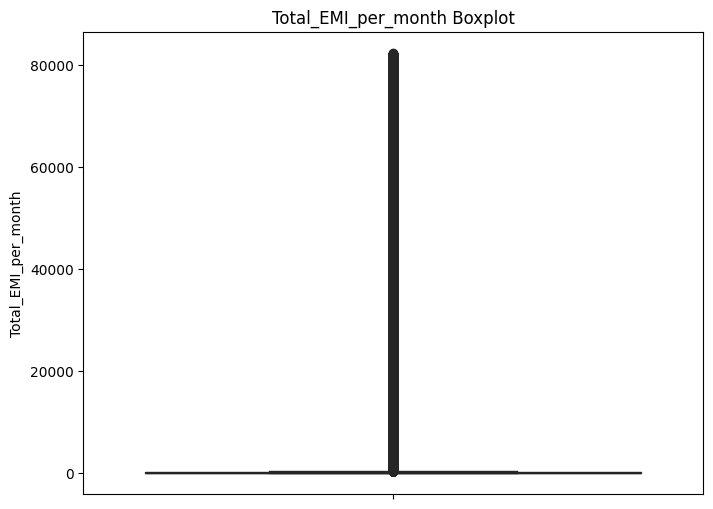

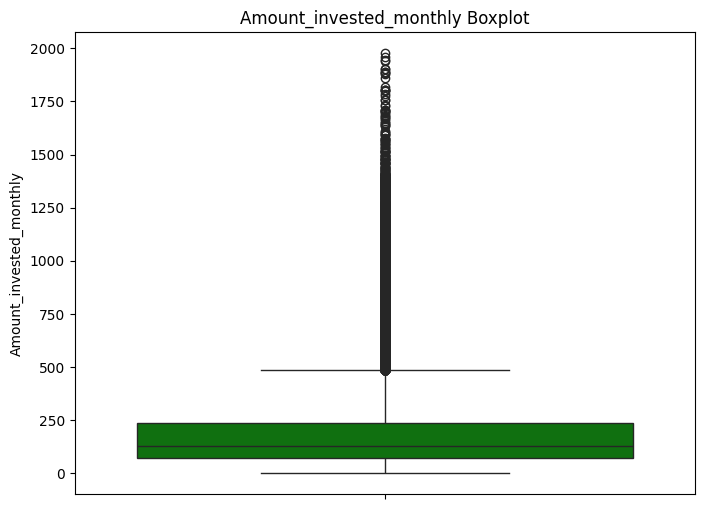

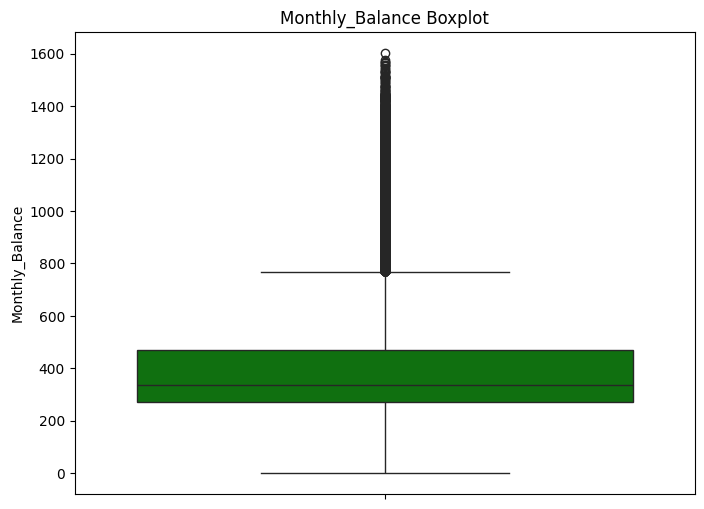

In [13]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col], color='green')
    plt.title(f'{col} Boxplot')
    plt.show()

In [14]:
data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.000000,9.302000e+04,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,97123.000000
mean,110.934505,1.785790e+05,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,1403.118217,195.539456,402.164483
std,689.407864,1.442878e+06,3183.686167,117.404834,129.05741,466.422621,62.500940,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,8306.041270,199.564527,213.644217
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,30.306660,72.236692,269.998334
50%,33.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.472111
75%,42.000000,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,36.496663,161.224249,236.815814,469.652004
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


In [15]:
def remove_outliers(df, numerical_columns):
    for col in numerical_columns:
        if df[col].min() < 0:
            df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

In [16]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data = remove_outliers(data, numeric_columns)

In [17]:
data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,94175.000000,93020.000000,84998.000000,99979.000000,100000.000000,100000.000000,91339.000000,99409.000000,89632.000000,96323.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,97123.000000
mean,33.971181,51250.643005,4167.185807,5.469349,5.668825,15.008950,3.563368,21.034081,13.569122,10.589035,5.986770,1400.429230,32.285156,108.054040,175.444061,387.914087
std,11.653174,38694.772663,3105.074259,2.718134,2.229002,9.263065,2.476733,14.358881,6.388581,6.609487,4.138214,1086.800228,5.116818,104.531770,136.799698,174.810246
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,25.000000,19435.600000,1625.568229,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.570000,3.000000,566.080000,28.052567,30.306660,72.236692,269.998334
50%,33.000000,37550.740000,3093.745000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.520000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.472111
75%,42.000000,72843.380000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.010000,9.000000,1948.200000,36.496663,161.224249,236.815814,469.652004
max,67.500000,152955.050000,12455.268490,13.000000,11.500000,38.000000,9.500000,55.000000,31.500000,29.170000,18.000000,4021.380000,49.162808,357.600632,483.684497,769.132510


In [18]:
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [19]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

In [20]:
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

In [21]:
categorical_columns = list(categorical_columns[:-2])

In [22]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [23]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [25]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('sampler',RandomUnderSampler(random_state = 42)),
    ('classifier', GaussianNB())
])

In [26]:
encoder = LabelEncoder()
data['Credit_Score'] = encoder.fit_transform(data['Credit_Score'])

In [27]:
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Occupation', 'Credit_Mix',
                                                   'Payment_of_Min_Amount'])])),
                ('sampler', RandomUnderSampler(random_state=42)),
                ('classifier', GaussianNB())])

In [30]:
y_pred = model_pipeline.predict(X_test)

In [31]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"Accuracy: {ac}")
print(f"Confusion Matrix: \n{cm}")
print(f"Classification Report: \n{cr}")

Accuracy: 0.6104
Confusion Matrix: 
[[2993  103  431]
 [1009 4181  684]
 [2989 2576 5034]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.43      0.85      0.57      3527
           1       0.61      0.71      0.66      5874
           2       0.82      0.47      0.60     10599

    accuracy                           0.61     20000
   macro avg       0.62      0.68      0.61     20000
weighted avg       0.69      0.61      0.61     20000

